In [ ]:
import tensorflow as tf
import numpy as np
import zipfile
import os

In [ ]:
my_zip = '/content/201810381.zip'
new_zip = zipfile.ZipFile(my_zip, 'r')
new_zip.extractall('/content')
new_zip.close()

In [ ]:
base_dir = '/content/fashion'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

train_top_dir = os.path.join(train_dir, 'top')
train_pants_dir = os.path.join(train_dir, 'pants')
train_skirt_dir = os.path.join(train_dir, 'skirt')
train_shoes_dir = os.path.join(train_dir, 'shoes')

validation_top_dir = os.path.join(validation_dir, 'top')
validation_pants_dir = os.path.join(validation_dir, 'pants')
validation_skirt_dir = os.path.join(validation_dir, 'skirt')
validation_shoes_dir = os.path.join(validation_dir, 'shoes')

print('훈련용 상의 데이터 개수 : ', len(os.listdir(train_top_dir)))
print('훈련용 바지 데이터 개수 : ', len(os.listdir(train_pants_dir)))
print('훈련용 치마 데이터 개수 : ', len(os.listdir(train_skirt_dir)))
print('훈련용 신발 데이터 개수 : ', len(os.listdir(train_shoes_dir)))

print('검증용 상의 데이터 개수 : ', len(os.listdir(validation_top_dir)))
print('검증용 바지 데이터 개수 : ', len(os.listdir(validation_pants_dir)))
print('검증용 치마 데이터 개수 : ', len(os.listdir(validation_skirt_dir)))
print('검증용 신발 데이터 개수 : ', len(os.listdir(validation_shoes_dir)))

훈련용 상의 데이터 개수 :  500
훈련용 바지 데이터 개수 :  500
훈련용 치마 데이터 개수 :  500
훈련용 신발 데이터 개수 :  500
검증용 상의 데이터 개수 :  250
검증용 바지 데이터 개수 :  250
검증용 치마 데이터 개수 :  250
검증용 신발 데이터 개수 :  250


In [ ]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

Found 2000 images belonging to 4 classes.
Found 1000 images belonging to 4 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 

    tf.keras.layers.Flatten(), 

    tf.keras.layers.Dense(64, activation='relu'), 
    tf.keras.layers.Dropout(0.5), 
    tf.keras.layers.Dense(4, activation='softmax')  
])

model.summary()

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', verbose=1, patience=5)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [ ]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    steps_per_epoch=100,
    epochs=20,
    validation_steps=50,
    callbacks=[early_stopping])

Epoch 1/20
100/100 [==============================] - 90s 895ms/step - loss: 0.8408 - accuracy: 0.6710 - val_loss: 0.4399 - val_accuracy: 0.8710
Epoch 2/20
100/100 [==============================] - 89s 891ms/step - loss: 0.2475 - accuracy: 0.9220 - val_loss: 0.2385 - val_accuracy: 0.9370
Epoch 3/20
100/100 [==============================] - 92s 919ms/step - loss: 0.1290 - accuracy: 0.9630 - val_loss: 0.2044 - val_accuracy: 0.9570
Epoch 4/20
100/100 [==============================] - 90s 899ms/step - loss: 0.0766 - accuracy: 0.9750 - val_loss: 0.2706 - val_accuracy: 0.9400
Epoch 5/20
100/100 [==============================] - 90s 900ms/step - loss: 0.1116 - accuracy: 0.9600 - val_loss: 0.1496 - val_accuracy: 0.9780
Epoch 6/20
100/100 [==============================] - 91s 908ms/step - loss: 0.0525 - accuracy: 0.9830 - val_loss: 0.3025 - val_accuracy: 0.9680
Epoch 7/20
100/100 [==============================] - 91s 905ms/step - loss: 0.0785 - accuracy: 0.9790 - val_loss: 0.3621 - val_ac

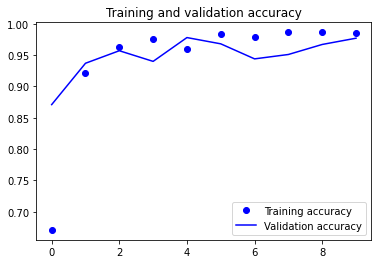

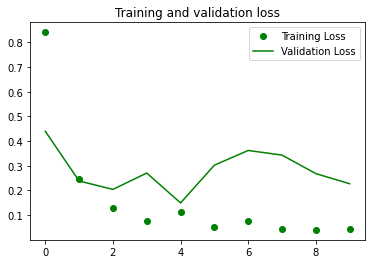

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'go', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
print("훈련 정확도는 " + str(round(acc[-1]*100,2)) + "% 입니다.")
print("훈련 손실값은 " + str(round(loss[-1]*100,2)) + "% 입니다.")
print("검증 정확도는 " + str(round(val_acc[-1]*100,2)) + "% 입니다.")
print("검증 손실값은 " + str(round(val_loss[-1]*100,2)) + "% 입니다.")

훈련 정확도는 98.5% 입니다.
훈련 손실값은 4.25% 입니다.
검증 정확도는 97.7% 입니다.
검증 손실값은 22.73% 입니다.


In [ ]:
from keras.preprocessing import image

categories = os.listdir(test_dir)

for cat in categories:
  for i in range(len(os.listdir(test_dir + '/' + cat))):
    path=test_dir + '/' + cat + '/' + cat +' (' + str(i+1) + ').jpg'
    img=image.load_img(path, target_size=(150, 150))
    x=image.img_to_array(img)
    x=np.expand_dims(x, axis=0)
    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)

    if classes[0][0] >= 0.8: print("해당 "+ cat + ' (' + str(i+1) + ').jpg'+" 이미지는 바지로 추정됩니다.")
    if classes[0][1] >= 0.8: print("해당 "+ cat + ' (' + str(i+1) + ').jpg'+" 이미지는 신발로 추정됩니다.")
    if classes[0][2] >= 0.8: print("해당 "+ cat + ' (' + str(i+1) + ').jpg'+" 이미지는 치마로 추정됩니다.")
    if classes[0][3] >= 0.8: print("해당 "+ cat + ' (' + str(i+1) + ').jpg'+" 이미지는 상의로 추정됩니다.")

해당 shoes (1).jpg 이미지는 신발로 추정됩니다.
해당 shoes (2).jpg 이미지는 신발로 추정됩니다.
해당 shoes (3).jpg 이미지는 신발로 추정됩니다.
해당 shoes (4).jpg 이미지는 신발로 추정됩니다.
해당 shoes (5).jpg 이미지는 신발로 추정됩니다.
해당 shoes (6).jpg 이미지는 신발로 추정됩니다.
해당 shoes (7).jpg 이미지는 신발로 추정됩니다.
해당 shoes (8).jpg 이미지는 신발로 추정됩니다.
해당 shoes (9).jpg 이미지는 신발로 추정됩니다.
해당 shoes (10).jpg 이미지는 신발로 추정됩니다.
해당 skirt (1).jpg 이미지는 치마로 추정됩니다.
해당 skirt (2).jpg 이미지는 치마로 추정됩니다.
해당 skirt (3).jpg 이미지는 치마로 추정됩니다.
해당 skirt (4).jpg 이미지는 치마로 추정됩니다.
해당 skirt (5).jpg 이미지는 치마로 추정됩니다.
해당 skirt (6).jpg 이미지는 치마로 추정됩니다.
해당 skirt (7).jpg 이미지는 치마로 추정됩니다.
해당 skirt (8).jpg 이미지는 치마로 추정됩니다.
해당 skirt (9).jpg 이미지는 치마로 추정됩니다.
해당 skirt (10).jpg 이미지는 치마로 추정됩니다.
해당 pants (1).jpg 이미지는 바지로 추정됩니다.
해당 pants (2).jpg 이미지는 바지로 추정됩니다.
해당 pants (3).jpg 이미지는 바지로 추정됩니다.
해당 pants (4).jpg 이미지는 바지로 추정됩니다.
해당 pants (5).jpg 이미지는 바지로 추정됩니다.
해당 pants (6).jpg 이미지는 바지로 추정됩니다.
해당 pants (7).jpg 이미지는 바지로 추정됩니다.
해당 pants (8).jpg 이미지는 바지로 추정됩니다.
해당 pants (9).jpg 이미지는 바지로 추정됩니다.
해당 pants (10).jpg 이미지는 바지로 추정됩니다.
해당 top 

In [ ]:
from keras.preprocessing import image
from google.colab import files

uploaded=files.upload()
for fn in uploaded.keys():
  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))
  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  if classes[0][0] >= 0.8: print("해당 "+f"{fn} 이미지는 바지로 추정됩니다.")
  if classes[0][1] >= 0.8: print("해당 "+f"{fn} 이미지는 신발로 추정됩니다.")
  if classes[0][2] >= 0.8: print("해당 "+f"{fn} 이미지는 치마로 추정됩니다.")
  if classes[0][3] >= 0.8: print("해당 "+f"{fn} 이미지는 상의로 추정됩니다.")

Saving 다운로드.jpg to 다운로드.jpg
해당 다운로드.jpg 이미지는 신발로 추정됩니다.
